In [7]:
import fit_classes as fp
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt


errors = []
ERROR = 1 
def data_from_file(file):
    file_path = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())), file)
    name = str(file_path).split("/")[-1].split("\\")[-1]
    df = pd.read_csv(file_path, delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()

    SKIP1 = 1
    SKIP2_ =17
    SKIP2 = SKIP2_

    file_p = os.path.join(os.path.abspath(os.getcwd()), "data", "superposition.txt")
    vals = []
    var = None
    with open(file_p, "r") as file:
        for line in file:
            vals.append((line.strip().split(": ")[0],tuple(map(int, line.strip().split(": ")[-1].strip("()").split(", ")))))

    check = False

    for var in vals:
        if var[0] == name:
            SKIP1, SKIP2 = var[1]
            check = True

    if not check:
        if True:
            values = (SKIP1, SKIP2)
            with open(file_p, "a") as file:
                file.write(f"{name}: {values}\n")

    x1 = df["Latest: Time (s)"].to_numpy()[::SKIP1]
    x2 = df["Latest: Time (s)"].to_numpy()[::SKIP2]
    y1 = df["Latest: Potential 1 (V)"].to_numpy()[::SKIP1]
    y2 = df["Latest: Potential 2 (V)"].to_numpy()[::SKIP2]
    dy1 = ERROR*np.ones_like(y1)
    dy2 = ERROR*np.ones_like(y2)

    # data1 = fp.Data(x1, y1, dy1, name=str(file_path).split('/')[-1][0:-4].split("\\")[-1] + '_1')
    # data2 = fp.Data(x2, y2, dy2, name=str(file_path).split('/')[-1][0:-4].split("\\")[-1]  + '_2')
    data1 = fp.Data(x1, y1, dy1, name=os.path.splitext(os.path.basename(file_path))[0] + '_1')
    data2 = fp.Data(x2, y2, dy2, name=os.path.splitext(os.path.basename(file_path))[0] + '_2')
    data2.input = y1

    if not check:
        print(data2.name)
        data2.show()
    return data1, data2

        
def load_data_by_folder(root):
    folder_data = {}
    total_files = 0
    total_files += len([f for f in os.listdir(root)])

    current_file = 0
    data_list_input = []
    data_list = []
    for file in os.listdir(root):
        file_path = os.path.join(root, file)
        if os.path.isfile(file_path) and file.lower().endswith(".csv"):
            current_file += 1
            # os.system(f'echo "File: {current_file:>3}/{total_files}"')
            data1, data2 = data_from_file(file_path)
            data_list_input.append(data1)
            data_list.append(data2)
        
    if data_list:
        folder_data = np.array(data_list)
    return folder_data

data_arrays = load_data_by_folder(os.path.join(os.path.abspath(os.getcwd()), "data"))


In [8]:
datadict = {}
for dataset in data_arrays:
    datadict[dataset.name[0:-2]] = dataset # ON windows
    # if dataset[1].name == '2-5_190Hz_2':
    # print(dataset.name)
    # dataset.show()
         
print(datadict["2-3_250Hz"])

2-3_250Hz_2:
0.0	6.26373626374
0.024	6.74236874237
0.048	7.22588522589
0.072	7.67032967033
0.096	8.07081807082
0.12	8.4126984127
0.144	8.73992673993
0.168	9.00366300366
0.192	9.23321123321
0.216	9.42368742369
0.24	9.56043956044
0.264	9.65811965812
0.288	9.72161172161
0.312	9.71672771673
0.336	9.64835164835
0.36	9.54578754579
0.384	9.39438339438
0.408	9.20390720391
0.432	8.95970695971
0.456	8.6862026862
0.48	8.37362637363
0.504	8.00732600733
0.528	7.5873015873
0.552	7.16239316239
0.576	6.68376068376
0.6	6.18070818071
0.624	5.65811965812
0.648	5.08669108669
0.672	4.51526251526
0.696	3.89010989011
0.72	3.26984126984
0.744	2.64957264957
0.768	1.99511599512
0.792	1.31135531136
0.816	0.656898656899
0.84	-0.002442002442
0.864	-0.681318681319
0.888	-1.33089133089
0.912	-2.00488400488
0.936	-2.67399267399
0.96	-3.28449328449
0.984	-3.91941391941
1.008	-4.54456654457
1.032	-5.12576312576
1.056	-5.70207570208
1.08	-6.23443223443
1.104	-6.7326007326
1.128	-7.21611721612
1.152	-7.6800976801
1.176	-

# Opgave 1

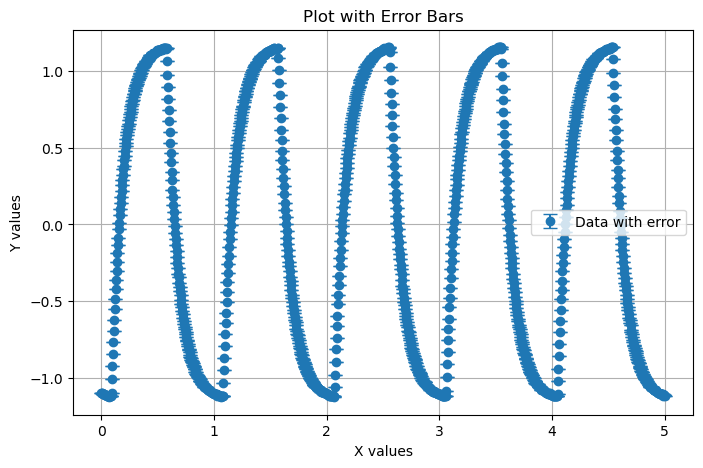

In [9]:
ERROR = 0.01
dataset = fp.Data(datadict["2-1"].x[25:145], datadict["2-1"].y[25:145], ERROR*datadict["2-1"].dy[25:145])
volle_data=fp.Data(datadict["2-1"].x, datadict["2-1"].y, ERROR*datadict["2-1"].dy)

def model_opgave1(params, x):
    tau,a = params
    return (1-np.exp(-(x-0.160)/tau))*a

# dataset.fit(model_opgave1).show()
# print(dataset.fit(model_opgave1))
# volle_data.show()
x=datadict["2-1"].x
y=datadict["2-1"].y
y_err=0
plt.figure(figsize=(8, 5))

plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, label='Data with error')

# Labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot with Error Bars')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Opgave 2

In [10]:
ERROR = 0.01
files = []
files_opdracht2 = []
for key in datadict:
    if key[0:3] == "2-2":
        files.append(fp.Data(datadict[key].x, datadict[key].y, ERROR*datadict[key].dy, name=datadict[key].name))

def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

        
for dataset in files:
    A = 1.25
    f = 6
    phi = np.pi
    c = 0

    file_p = os.path.join(os.path.abspath(os.getcwd()), "data", "guesses_opgave2.txt")
    vals = []
    var = None
    check = True

    with open(file_p, "r") as file:
        for line in file:
            vals.append((line.strip().split(": ")[0],tuple(map(float, line.strip().split(": ")[-1].strip("()").split(", ")))))
    for var in vals:
        if var[0] == dataset.name:
            A, f, phi, c = var[1]
            check = False

    dataset_new = dataset.fit(sinus_model, initial_guess=[A, f, phi, c])
    files_opdracht2.append(dataset_new)
    if dataset_new.chi2_red > 10:
        check = False
            
    if check:
        values = tuple([_ for _ in dataset_new.minima])
        with open(file_p, "a") as file:
            file.write(f"{dataset.name}: {values}\n")

    # WARNING: shows all fits
    if dataset_new.chi2_red > 0:
        print(dataset.name)
        print(dataset_new)
        # dataset_new.show(size=1)
        print()
        print("\n\n\n")

2-2_20Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      1.25889 \pm      0.00087 $
For parameter f        :     $     19.75110 \pm      0.00004 $
For parameter phi      :     $      2.90558 \pm      0.00069 $
For parameter c        :     $      0.01030 \pm      0.00061 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min         454.75818468
Reduced χ² value       :     χ²_red           0.36468178
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------






2-2_30Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      1.25532 \pm      0.00087 $
For parameter f        :     $    

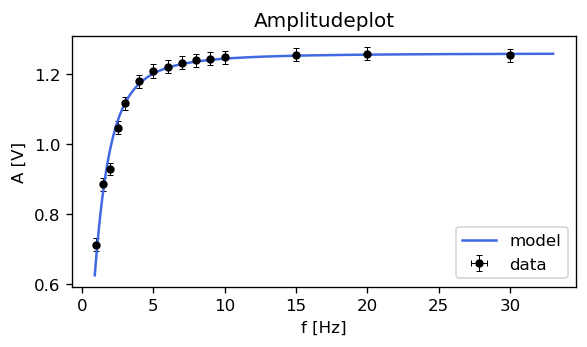

----------------------------------------------------------------------------------------------------------------
For parameter tau      :     $      0.63404 \pm      0.02042 $
For parameter a        :     $      1.26073 \pm      0.00800 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          17.00338808
Reduced χ² value       :     χ²_red           1.30795293
P-value                :     p-value          0.19914924
----------------------------------------------------------------------------------------------------------------



In [11]:

def amplitude_model(params, x):
    tau,a = params
    return a*tau*x/(np.sqrt(1+ tau**2*x**2))
def phi_model(params, x):
    tau,c=params
    return 1/(tau*x)+c

A_lst=[0.71225,0.88560,0.92924 ,1.047561 , 1.11749,1.18034, 1.20992, 1.22187,  1.23368 ,1.24062 , 1.24495 ,1.24865, 1.25598, 1.25889,1.25532  ]
A_err=[0.0186 ,0.0187,0.0186, 0.0187 ,0.0187 ,0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187, 0.0187 ]
freq_lst=[1,1.5,2,2.5,3,4,5,6,7,8,9,10,15,20,30]
phi_lst=[2.54811 ,1.98181,0.45856,1.17311,0.81930,0.39807,-0.19058,-0.31327,0.03117,0.36017,0.27102, -0.35514, 1.08404, -0.23601 , -0.35204  ]
phi_err=[0.094,0.094,0.094,0.078, 0.083, 0.084,0.094,0.094,0.094,0.094,0.094,0.094,0.094,0.094,0.094]
A_set=fp.Data(freq_lst,A_lst,A_err)
phi_set=fp.Data(freq_lst,(phi_lst),phi_err)
A_set.fit(model=amplitude_model).show(title='Amplitudeplot',x_label='f [Hz]',y_label='A [V]')
print(A_set.fit(model=amplitude_model))

# phi_set.show()


# Opgave 3

2-3_300Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.66249 \pm      0.01575 $
For parameter f        :     $      0.38783 \pm      0.00011 $
For parameter phi      :     $      4.74063 \pm      0.00154 $
For parameter c        :     $      0.04182 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min         392.82876829
Reduced χ² value       :     χ²_red           4.09196634
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



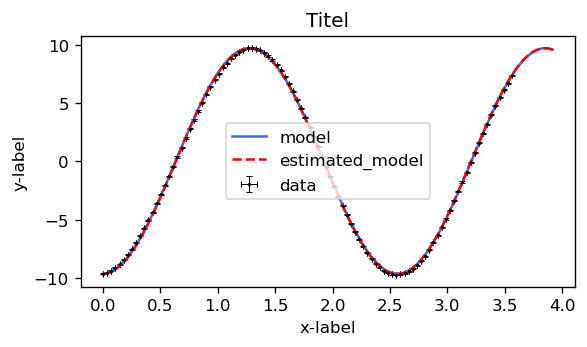





2-3_200Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.67223 \pm      0.01516 $
For parameter f        :     $      0.97676 \pm      0.00023 $
For parameter phi      :     $     -0.02212 \pm      0.00160 $
For parameter c        :     $      0.03991 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min        2858.23094101
Reduced χ² value       :     χ²_red          29.77323897
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



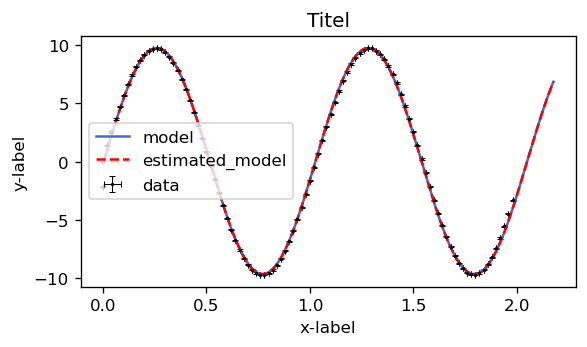





2-3_280Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.63326 \pm      0.01969 $
For parameter f        :     $      0.08179 \pm      0.00012 $
For parameter phi      :     $     -1.03920 \pm      0.00170 $
For parameter c        :     $      0.13138 \pm      0.01259 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          20.54649527
Reduced χ² value       :     χ²_red           0.29352136
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



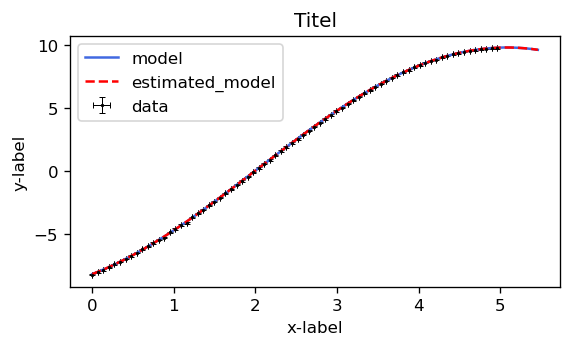





2-3_210Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $     -8.57964 \pm      0.01549 $
For parameter f        :     $      1.22119 \pm      0.00030 $
For parameter phi      :     $     -1.53197 \pm      0.00177 $
For parameter c        :     $     -0.34964 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min      153518.81957244
Reduced χ² value       :     χ²_red        1599.15437055
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



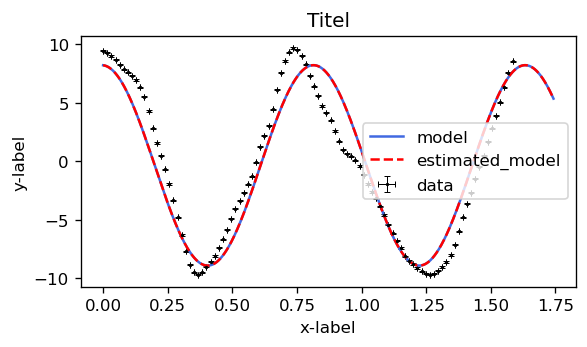





2-3_100Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.69685 \pm      0.01544 $
For parameter f        :     $      2.57618 \pm      0.00021 $
For parameter phi      :     $     -3.00163 \pm      0.00157 $
For parameter c        :     $      0.00937 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          60.54875517
Reduced χ² value       :     χ²_red           0.63071620
P-value                :     p-value          0.99822630
----------------------------------------------------------------------------------------------------------------



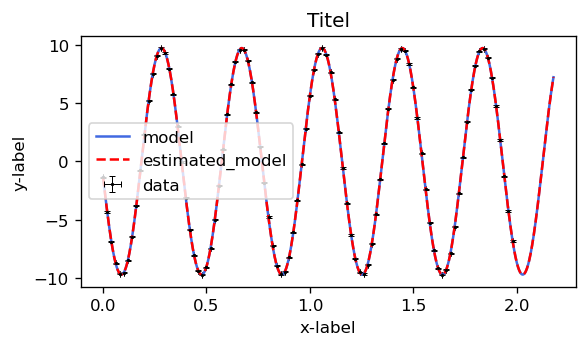





2-3_250Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.69660 \pm      0.01502 $
For parameter f        :     $      0.46289 \pm      0.00018 $
For parameter phi      :     $      0.70135 \pm      0.00161 $
For parameter c        :     $     -0.00114 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          20.21755958
Reduced χ² value       :     χ²_red           0.21059958
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



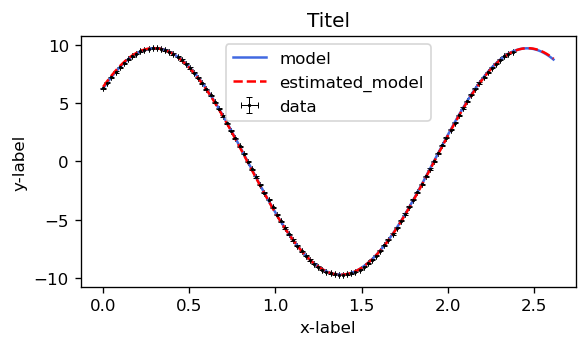





2-3_240Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.83938 \pm      0.01537 $
For parameter f        :     $      1.54819 \pm      0.00013 $
For parameter phi      :     $     -1.66139 \pm      0.00155 $
For parameter c        :     $      0.01605 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min         450.11480365
Reduced χ² value       :     χ²_red           4.68869587
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



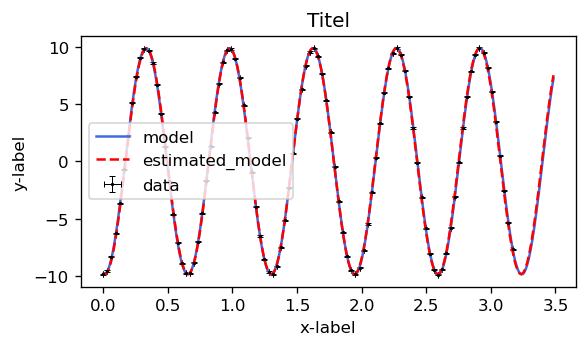





2-3_220Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.69530 \pm      0.01533 $
For parameter f        :     $      1.59376 \pm      0.00012 $
For parameter phi      :     $     -2.93694 \pm      0.00158 $
For parameter c        :     $      0.00297 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min         107.65973944
Reduced χ² value       :     χ²_red           1.12145562
P-value                :     p-value          0.19564037
----------------------------------------------------------------------------------------------------------------



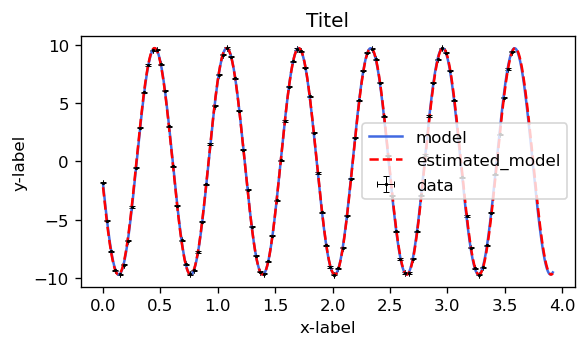

In [12]:
ERROR = 0.05
files = []
files_opdracht2 = []
for key in datadict:
    if key[0:3] == "2-3":
        files.append(fp.Data(datadict[key].x[:100], datadict[key].y[:100], ERROR*datadict[key].dy[:100], name=datadict[key].name))

def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

        
for dataset in files:
    A = 10
    f = 1
    phi = -np.pi/4
    c = 1

    file_p = os.path.join(os.path.abspath(os.getcwd()), "data", "guesses_opgave3.txt")
    vals = []
    var = None
    check = True

    with open(file_p, "r") as file:
        for line in file:
            vals.append((line.strip().split(": ")[0],tuple(map(float, line.strip().split(": ")[-1].strip("()").split(", ")))))
    for var in vals:
        if var[0] == dataset.name:
            A, f, phi, c = var[1]
            check = False

    # dataset.show()
    try:
        dataset_new = dataset.fit(sinus_model, initial_guess=[A, f, phi, c])
        files_opdracht2.append(dataset_new)
        if dataset_new.chi2_red > 10:
            check = False
                
        if check:
            values = tuple([_ for _ in dataset_new.minima])
            with open(file_p, "a") as file:
                file.write(f"{dataset.name}: {values}\n")

        # WARNING: shows all fits
        if dataset_new.chi2_red > 0:
            print(dataset.name)
            print(dataset_new)
            dataset_new.show(size=1, fit_guess=True)
            print("\n\n\n")
    except ValueError:
        dataset.show()

In [13]:
[ 9.69685,9.67223,9.69530,9.83938, 9.69660 , 9.63326,9.66249]

[9.69685, 9.67223, 9.6953, 9.83938, 9.6966, 9.63326, 9.66249]

In [14]:
ERROR = 0.05
files = []
files_opdracht2 = []
for key in datadict:
    if key[0:3] == "2-4":
        files.append(fp.Data(datadict[key].x[:100], datadict[key].y[:100], ERROR*datadict[key].dy[:100], name=datadict[key].name))

def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

        
for dataset in files:
    A = 10
    f = 1
    phi = -np.pi/4
    c = 1

    file_p = os.path.join(os.path.abspath(os.getcwd()), "Data", "guesses_opgave4.txt")
    vals = []
    var = None
    check = True

    with open(file_p, "r") as file:
        for line in file:
            vals.append((line.strip().split(": ")[0],tuple(map(float, line.strip().split(": ")[-1].strip("()").split(", ")))))
    for var in vals:
        if var[0] == dataset.name:
            A, f, phi, c = var[1]
            check = False

    # dataset.show()
    try:
        dataset_new = dataset.fit(sinus_model, initial_guess=[A, f, phi, c])
        files_opdracht2.append(dataset_new)
        if dataset_new.chi2_red > 10:
            check = False
                
        if check:
            values = tuple([_ for _ in dataset_new.minima])
            with open(file_p, "a") as file:
                file.write(f"{dataset.name}: {values}\n")

        # WARNING: shows all fits
        if dataset_new.chi2_red > 0:
            print(dataset.name)
            print(dataset_new)
            dataset_new.show(size=1, fit_guess=True)
            print("\n\n\n")
    except ValueError:
        dataset.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/mathi/Experimentele/Practicum9/Data/guesses_opgave4.txt'

2-5_100Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $     -9.84662 \pm      0.01540 $
For parameter f        :     $     -1.77097 \pm      0.00022 $
For parameter phi      :     $     28.59894 \pm      0.00155 $
For parameter c        :     $      0.00696 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          34.03548623
Reduced χ² value       :     χ²_red           0.35453631
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



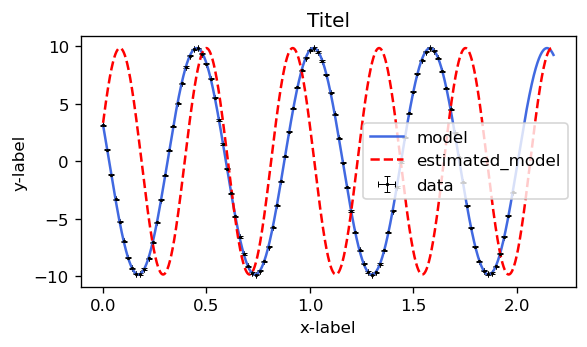





2-5_150Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84156 \pm      0.01481 $
For parameter f        :     $      1.11905 \pm      0.00023 $
For parameter phi      :     $      0.86756 \pm      0.00162 $
For parameter c        :     $      0.00476 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          28.03936636
Reduced χ² value       :     χ²_red           0.29207673
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



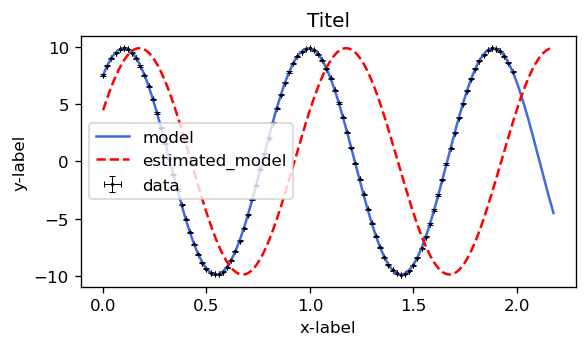





2-5_160Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84480 \pm      0.01543 $
For parameter f        :     $      1.85939 \pm      0.00010 $
For parameter phi      :     $     -0.67898 \pm      0.00155 $
For parameter c        :     $      0.00727 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          36.33523959
Reduced χ² value       :     χ²_red           0.37849208
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



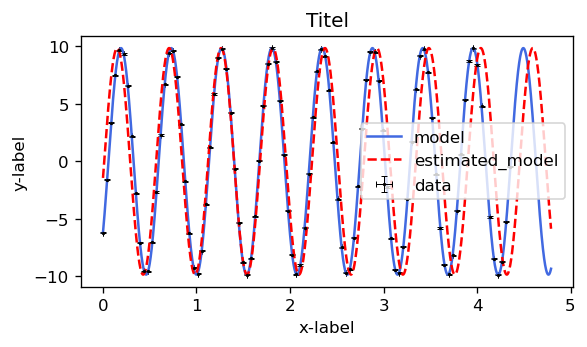





2-5_170Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84546 \pm      0.01520 $
For parameter f        :     $      2.74813 \pm      0.00036 $
For parameter phi      :     $     -1.79531 \pm      0.00157 $
For parameter c        :     $      0.01188 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          47.68060375
Reduced χ² value       :     χ²_red           0.49667296
P-value                :     p-value          0.99999117
----------------------------------------------------------------------------------------------------------------



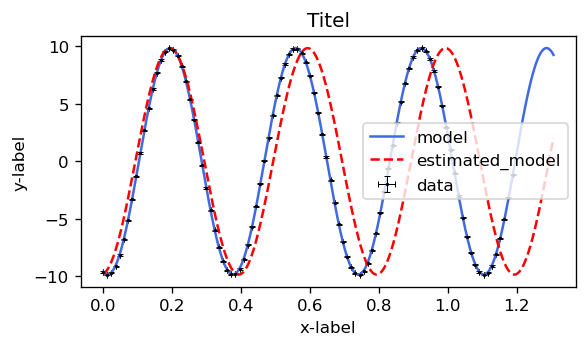





2-5_180Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84281 \pm      0.01539 $
For parameter f        :     $      1.62256 \pm      0.00015 $
For parameter phi      :     $      0.24712 \pm      0.00155 $
For parameter c        :     $     -0.07391 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min        1784.32794289
Reduced χ² value       :     χ²_red          18.58674941
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



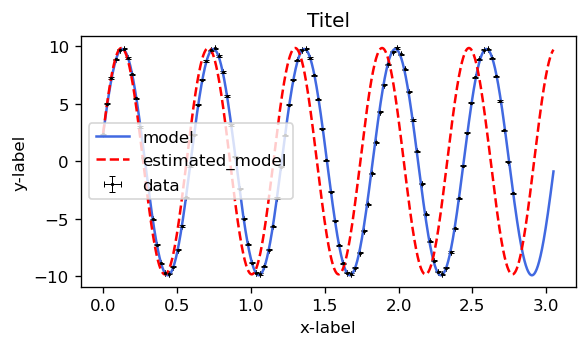





2-5_185Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84211 \pm      0.01669 $
For parameter f        :     $      0.67413 \pm      0.00010 $
For parameter phi      :     $     -0.28419 \pm      0.00170 $
For parameter c        :     $      0.01364 \pm      0.01182 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          32.95873447
Reduced χ² value       :     χ²_red           0.41198418
P-value                :     p-value          0.99999933
----------------------------------------------------------------------------------------------------------------



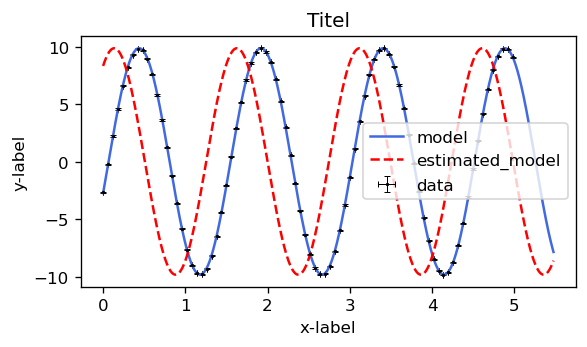





2-5_190Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.84460 \pm      0.01515 $
For parameter f        :     $      1.73847 \pm      0.00028 $
For parameter phi      :     $     -2.94814 \pm      0.00157 $
For parameter c        :     $      0.00339 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min          26.58983313
Reduced χ² value       :     χ²_red           0.27697743
P-value                :     p-value          1.00000000
----------------------------------------------------------------------------------------------------------------



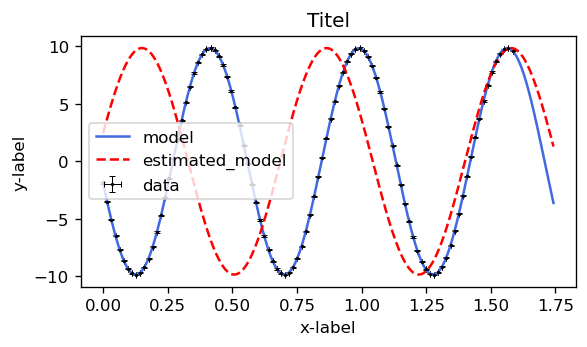





2-5_200Hz_2
----------------------------------------------------------------------------------------------------------------
For parameter A        :     $      9.73215 \pm      0.01544 $
For parameter f        :     $      0.72690 \pm      0.00023 $
For parameter phi      :     $     -0.85083 \pm      0.00156 $
For parameter c        :     $      0.11267 \pm      0.01083 $
----------------------------------------------------------------------------------------------------------------
Minimal χ² value       :     χ²_min         678.90366659
Reduced χ² value       :     χ²_red           7.07191319
P-value                :     p-value          0.00000000
----------------------------------------------------------------------------------------------------------------



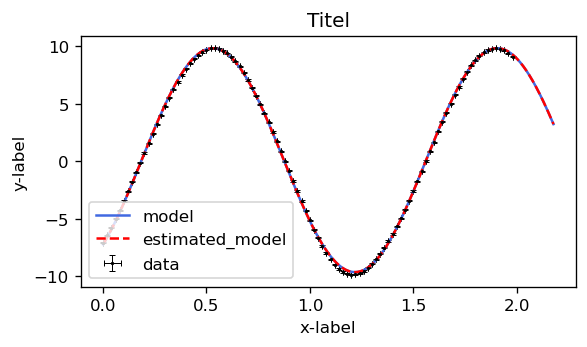

In [ ]:
ERROR = 0.05
files = []
files_opdracht2 = []
for key in datadict:
    if key[0:3] == "2-5":
        files.append(fp.Data(datadict[key].x[:100], datadict[key].y[:100], ERROR*datadict[key].dy[:100], name=datadict[key].name))

def sinus_model(params, x):
    A,f,phi,c = params
    return A*np.sin(2*np.pi*f*x + phi) + c

        
for dataset in files:
    A = 10
    f = 1
    phi = -np.pi/4
    c = 1

    file_p = os.path.join(os.path.abspath(os.getcwd()), "data", "guesses_opgave5.txt")
    vals = []
    var = None
    check = True

    with open(file_p, "r") as file:
        for line in file:
            vals.append((line.strip().split(": ")[0],tuple(map(float, line.strip().split(": ")[-1].strip("()").split(", ")))))
    for var in vals:
        if var[0] == dataset.name:
            A, f, phi, c = var[1]
            check = False

    # dataset.show()
    try:
        dataset_new = dataset.fit(sinus_model, initial_guess=[A, f, phi, c])
        files_opdracht2.append(dataset_new)
        if dataset_new.chi2_red > 10:
            check = False
                
        if check:
            values = tuple([_ for _ in dataset_new.minima])
            with open(file_p, "a") as file:
                file.write(f"{dataset.name}: {values}\n")

        # WARNING: shows all fits
        if dataset_new.chi2_red > 0:
            print(dataset.name)
            print(dataset_new)
            dataset_new.show(size=1, fit_guess=True)
            print("\n\n\n")
    except ValueError:
        dataset.show()

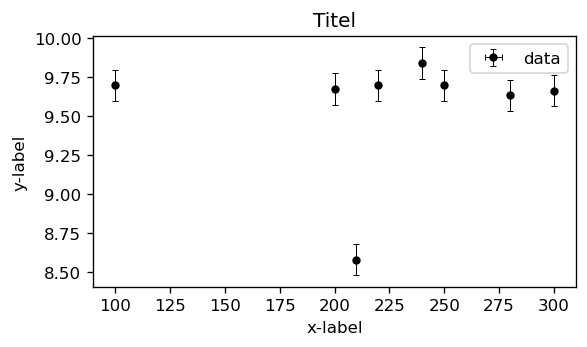

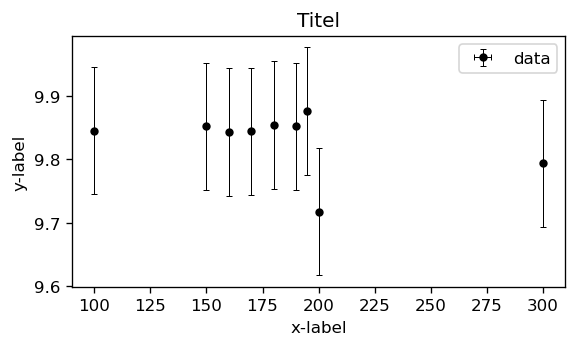

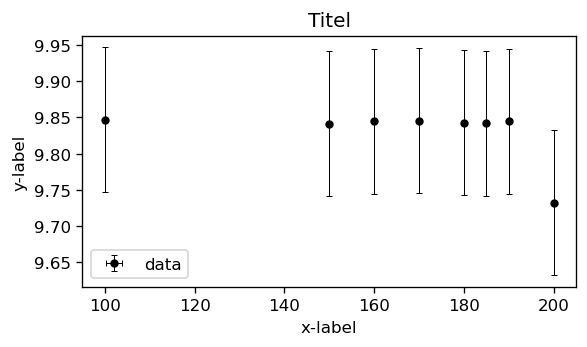

In [ ]:
A_300=[9.69685,  9.67223 ,8.57964 ,9.69530 , 9.83938,9.69660 ,9.63326 , 9.66249]
A_400=[ 9.84489,9.85144, 9.84261, 9.84352, 9.85356, 9.85181, 9.87574, 9.71722, 9.79323 ]
A_500=[9.84662, 9.84156,9.84480, 9.84546, 9.84281, 9.84211, 9.84460,9.73215]
f_300=[100,200,210,220,240,250,280,300]
f_400=[100,150,160,170,180,190,195,200,300]
f_500=[100,150,160,170,180,185,190,200]
A_300err=np.ones_like(A_300)*0.1
A_400err=np.ones_like(A_400)*0.1
A_500err=np.ones_like(A_500)*0.1

data300=fp.Data(f_300, A_300, A_300err)
data400=fp.Data(f_400, A_400, A_400err)
data500=fp.Data(f_500, A_500, A_500err)

data300.show()
data400.show()
data500.show()